# Gazi University Student Course Evaluation Analysis and Predictive Modeling

## Project Overview
This project aims to analyze and predict student course evaluations at Gazi University, Ankara, Turkey. Using a dataset of 5,820 student evaluation records, the goal is to identify the key factors influencing course satisfaction and develop an interpretable predictive model. The project emphasizes both predictive accuracy and transparency, ensuring compliance with industry standards and regulatory requirements.

## Objectives
- Predict student evaluation scores for courses based on historical data.
- Identify key factors influencing student satisfaction and instructor performance.
- Provide actionable insights to improve teaching effectiveness and course delivery.
- Ensure the model is interpretable and auditable for compliance purposes.

## Dataset
The dataset consists of:
- **28 Likert-scale questions (Q1–Q28)** assessing course content, teaching effectiveness, and instructor performance.
- **5 additional attributes**: `instr` (instructor ID), `class` (course code), `repeat` (number of course retakes), `attendance` (attendance level), and `difficulty` (perceived course difficulty).

| Attribute      | Description |
|----------------|-------------|
| instr          | Instructor identifier (1,2,3) |
| class          | Course code (1–13) |
| repeat         | Number of times the student is retaking the course |
| attendance     | Attendance level code (0–4) |
| difficulty     | Perceived course difficulty (1–5) |
| Q1–Q28         | Likert-scale evaluation questions (1–5) |

## Methodology
1. **Data Exploration & Preprocessing**
   - Inspect missing values, outliers, and distributions.
   - Encode categorical and ordinal features.
   - Engineer composite features and aggregate scores.

2. **Exploratory Data Analysis (EDA)**
   - Analyze correlations among features and target variables.
   - Perform dimensionality reduction (PCA / factor analysis) to identify latent factors.
   - Visualize patterns across courses, instructors, and student groups.

3. **Model Development**
   - Define predictive targets (aggregate or individual Q-scores).
   - Train interpretable models (linear regression, decision trees, gradient boosting with SHAP explanations).
   - Evaluate using RMSE, MAE, and R² metrics.
   - Ensure model interpretability for compliance.

4. **Validation & Evaluation**
   - Conduct cross-validation and holdout testing.
   - Analyze feature importance and partial dependence plots.
   - Test prediction robustness across different student and course scenarios.

5. **Deployment & Compliance**
   - Build a dashboard to display predictions, key influencing factors, and actionable insights.
   - Document data preprocessing, model decisions, and audit trail.
   - Monitor model performance and retrain periodically as new data becomes available.

6. **Innovative Applications**
   - Provide personalized instructor feedback.
   - Normalize course difficulty for fair evaluations.
   - Identify students at risk of poor evaluations to enable proactive interventions.

## Outcome
The final system will provide:
- Accurate and interpretable predictions of student course evaluations.
- Insights for instructors and administrators to enhance course delivery.
- A compliant and auditable framework aligned with industry best practices.


In [1]:
# ============================
# Environment Setup
# ============================

# Core libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# Dimensionality reduction / feature analysis
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Explainable AI
import shap
import warnings
warnings.filterwarnings("ignore")

# Set visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,6)

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Environment setup complete. Libraries imported successfully.")


Environment setup complete. Libraries imported successfully.


Dataset Shape: (5820, 33)

Dataset Columns: ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28']

First 5 rows:


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1



Missing Values per Column:
instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

Summary Statistics:


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000



Data Types:
instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object


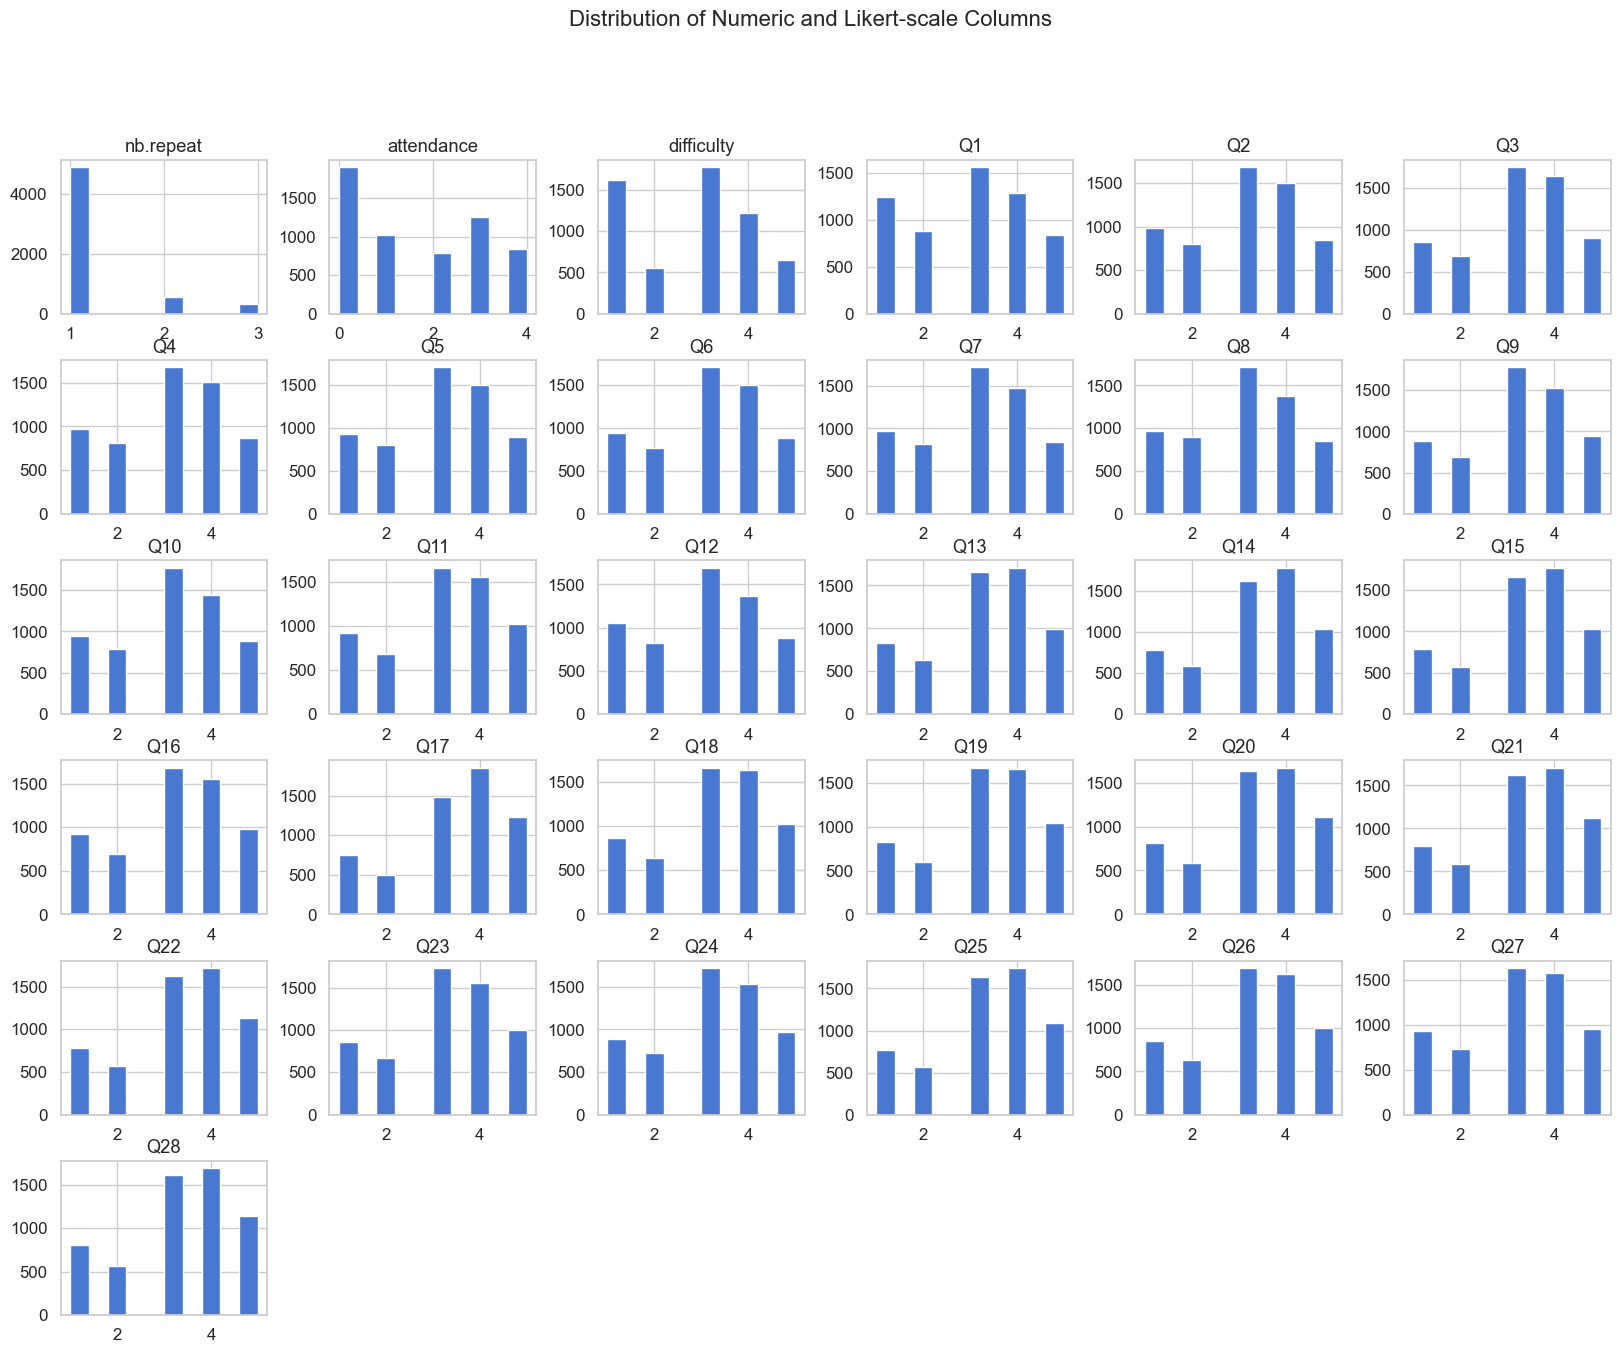

In [2]:
# ============================
# Load and Inspect Dataset
# ============================

# Load dataset
# Replace 'path_to_dataset.csv' with your actual file path
df = pd.read_csv("turkiye-student-evaluation_generic.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Basic statistics
print("\nSummary Statistics:")
display(df.describe())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Quick distribution check for numeric and ordinal columns
numeric_cols = ['nb.repeat', 'attendance', 'difficulty'] + [f'Q{i}' for i in range(1,29)]
df[numeric_cols].hist(bins=10, figsize=(20,15))
plt.suptitle("Distribution of Numeric and Likert-scale Columns", fontsize=16)
plt.show()


In [3]:
# ============================
# Data Preprocessing
# ============================

# Copy the dataset to avoid modifying original
df_processed = df.copy()

# ----------------------------
# 1. Encode categorical features
# ----------------------------
# 'instr' and 'class' are categorical
df_processed['instr'] = df_processed['instr'].astype('category')
df_processed['class'] = df_processed['class'].astype('category')

# One-hot encoding using pandas
df_processed = pd.get_dummies(df_processed, columns=['instr', 'class'], drop_first=True)

# ----------------------------
# 2. Create aggregate/summary features
# ----------------------------
# Average of all 28 Q-scores (overall satisfaction)
df_processed['avg_Qscore'] = df_processed[[f'Q{i}' for i in range(1,29)]].mean(axis=1)

# Optional: Group Q1–Q28 into thematic scores (content, teaching, evaluation)
# Example: First 9 Qs = Course Content, Next 10 Qs = Teaching, Last 9 Qs = Evaluation
df_processed['content_score'] = df_processed[[f'Q{i}' for i in range(1,10)]].mean(axis=1)
df_processed['teaching_score'] = df_processed[[f'Q{i}' for i in range(10,20)]].mean(axis=1)
df_processed['evaluation_score'] = df_processed[[f'Q{i}' for i in range(20,29)]].mean(axis=1)

# ----------------------------
# 3. Feature list separation
# ----------------------------
# Predictor features
X = df_processed.drop(columns=[f'Q{i}' for i in range(1,29)] + ['avg_Qscore'])
# Target variable
y = df_processed['avg_Qscore']

print("Preprocessing complete.")
print("Predictor feature shape:", X.shape)
print("Target variable shape:", y.shape)


Preprocessing complete.
Predictor feature shape: (5820, 20)
Target variable shape: (5820,)


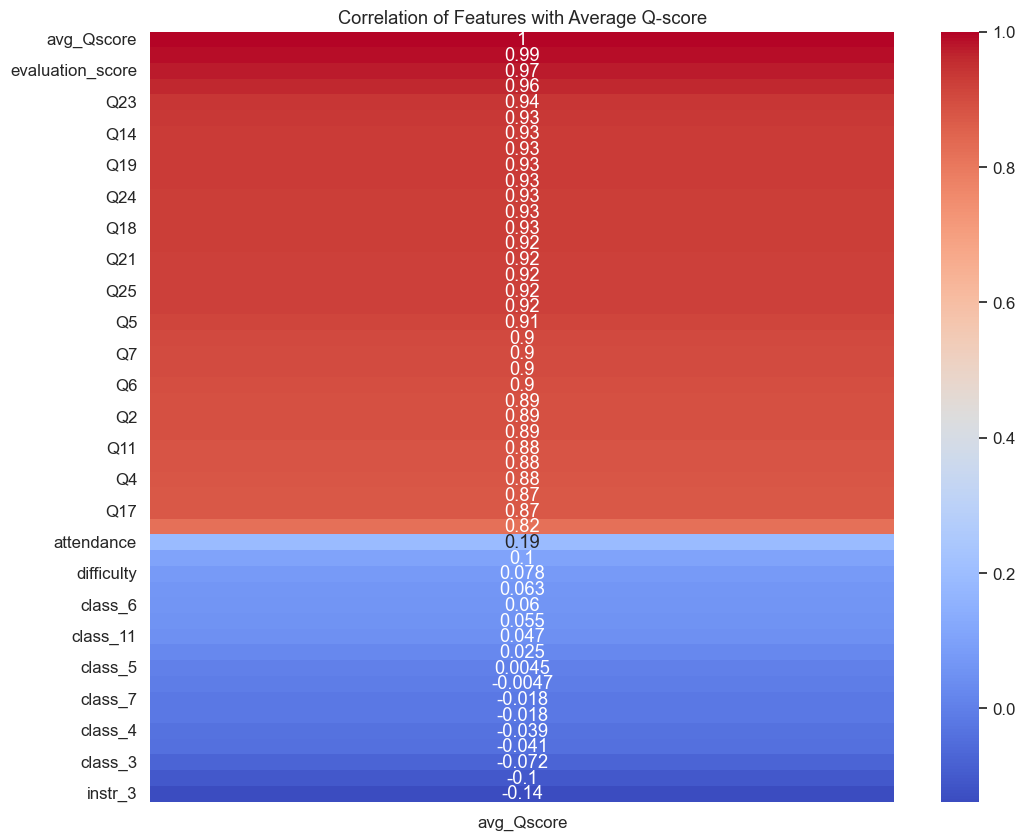

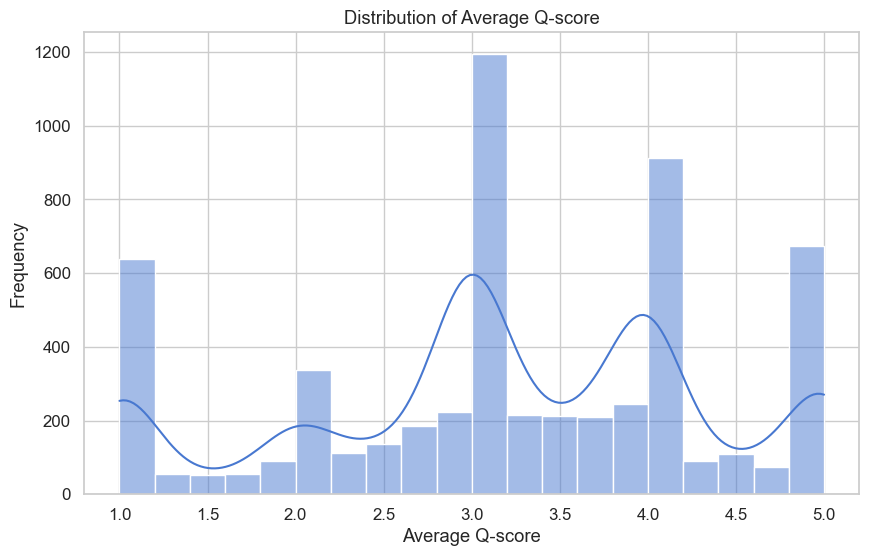

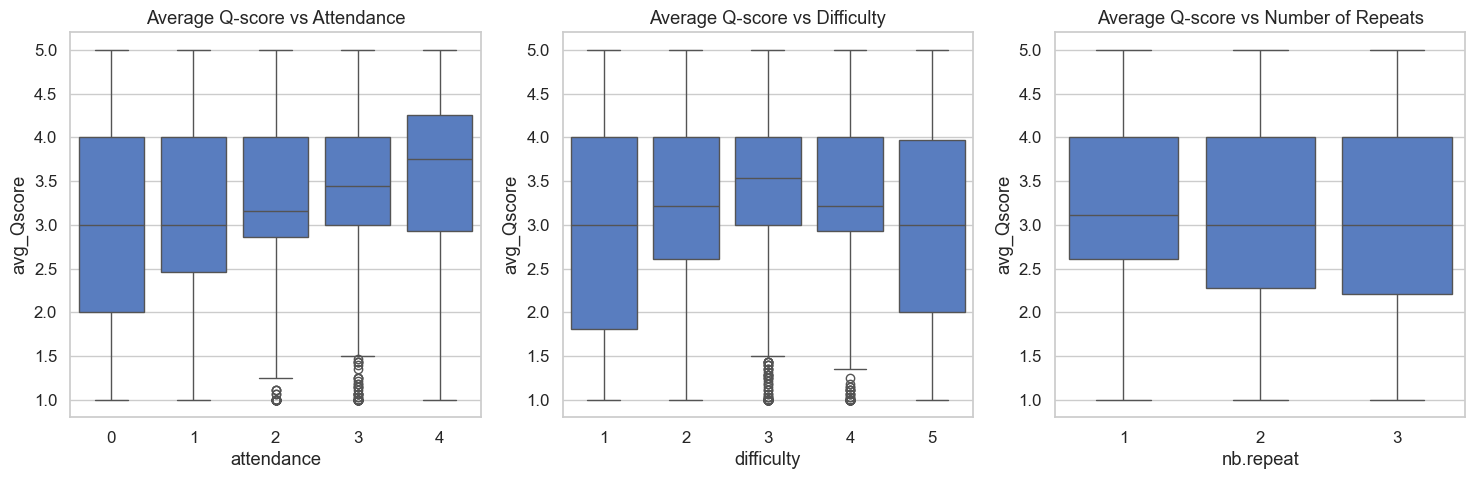

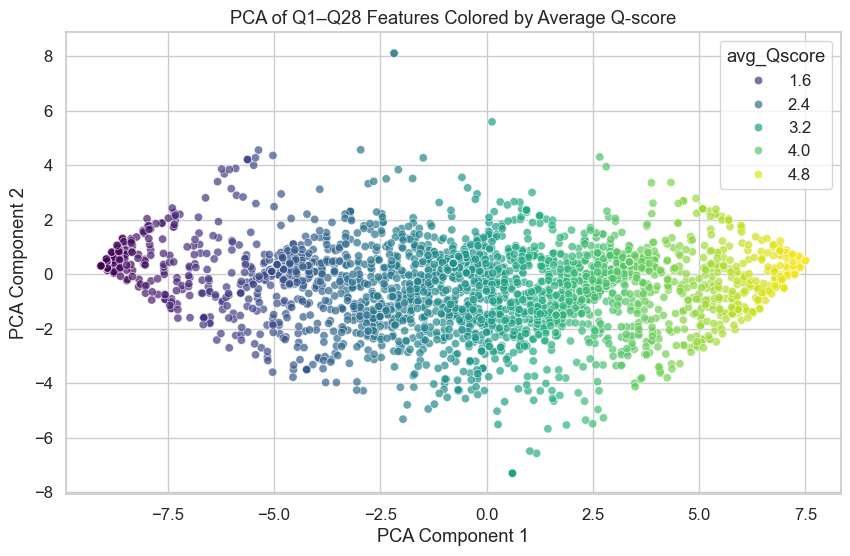

In [4]:
# ============================
# Exploratory Data Analysis (EDA)
# ============================

# ----------------------------
# 1. Correlation analysis
# ----------------------------
plt.figure(figsize=(12,10))
corr_matrix = df_processed.corr()
sns.heatmap(corr_matrix[['avg_Qscore']].sort_values(by='avg_Qscore', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Average Q-score")
plt.show()

# ----------------------------
# 2. Distribution of target variable
# ----------------------------
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of Average Q-score")
plt.xlabel("Average Q-score")
plt.ylabel("Frequency")
plt.show()

# ----------------------------
# 3. Relationship with attendance, difficulty, repeat
# ----------------------------
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(x='attendance', y='avg_Qscore', data=df_processed, ax=axes[0])
axes[0].set_title("Average Q-score vs Attendance")
sns.boxplot(x='difficulty', y='avg_Qscore', data=df_processed, ax=axes[1])
axes[1].set_title("Average Q-score vs Difficulty")
sns.boxplot(x='nb.repeat', y='avg_Qscore', data=df_processed, ax=axes[2])
axes[2].set_title("Average Q-score vs Number of Repeats")
plt.show()

# ----------------------------
# 4. PCA for dimensionality reduction (optional)
# ----------------------------
from sklearn.preprocessing import StandardScaler
features = [f'Q{i}' for i in range(1,29)]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed[features])

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_processed['avg_Qscore'], palette='viridis', alpha=0.7)
plt.title("PCA of Q1–Q28 Features Colored by Average Q-score")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [7]:
# ============================
# Corrected Preprocessing & Baseline Model
# ============================

# 1. Exclude aggregate features to prevent target leakage
predictor_cols = [col for col in X.columns if col not in ['content_score', 'teaching_score', 'evaluation_score']]
X_corrected = X[predictor_cols]

# 2. Split dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_corrected, y, test_size=0.2, random_state=RANDOM_STATE
)

print("Corrected Training set shape:", X_train.shape)
print("Corrected Test set shape:", X_test.shape)

# 3. Baseline Model: Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# 4. Predictions
y_pred_train = baseline_model.predict(X_train)
y_pred_test = baseline_model.predict(X_test)

# 5. Evaluation function
def evaluate_model(y_true, y_pred, dataset="Test"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Set Evaluation:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R² Score: {r2:.3f}\n")

# 6. Evaluate baseline model
evaluate_model(y_train, y_pred_train, "Training")
evaluate_model(y_test, y_pred_test, "Test")

# 7. Feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': baseline_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Top features by coefficient magnitude:")
display(coef_df.head(10))


Corrected Training set shape: (4656, 17)
Corrected Test set shape: (1164, 17)
Training Set Evaluation:
RMSE: 1.113
MAE: 0.889
R² Score: 0.069

Test Set Evaluation:
RMSE: 1.155
MAE: 0.932
R² Score: 0.028

Top features by coefficient magnitude:


,Feature,Coefficient
4,instr_3,-0.360077
12,class_9,0.354997
11,class_8,0.337830
8,class_5,0.334893
5,class_2,0.295777
10,class_7,-0.238746
3,instr_2,0.178325
1,attendance,0.132612
13,class_10,0.124721
6,class_3,0.096513


Training (RF) Set Evaluation:
RMSE: 1.050
MAE: 0.835
R² Score: 0.172

Test (RF) Set Evaluation:
RMSE: 1.146
MAE: 0.917
R² Score: 0.044

Top features by importance:


,Feature,Importance
1,attendance,0.285960
2,difficulty,0.247346
0,nb.repeat,0.116776
4,instr_3,0.069521
16,class_13,0.059907
10,class_7,0.035879
6,class_3,0.027365
3,instr_2,0.022740
5,class_2,0.021095
15,class_12,0.017672


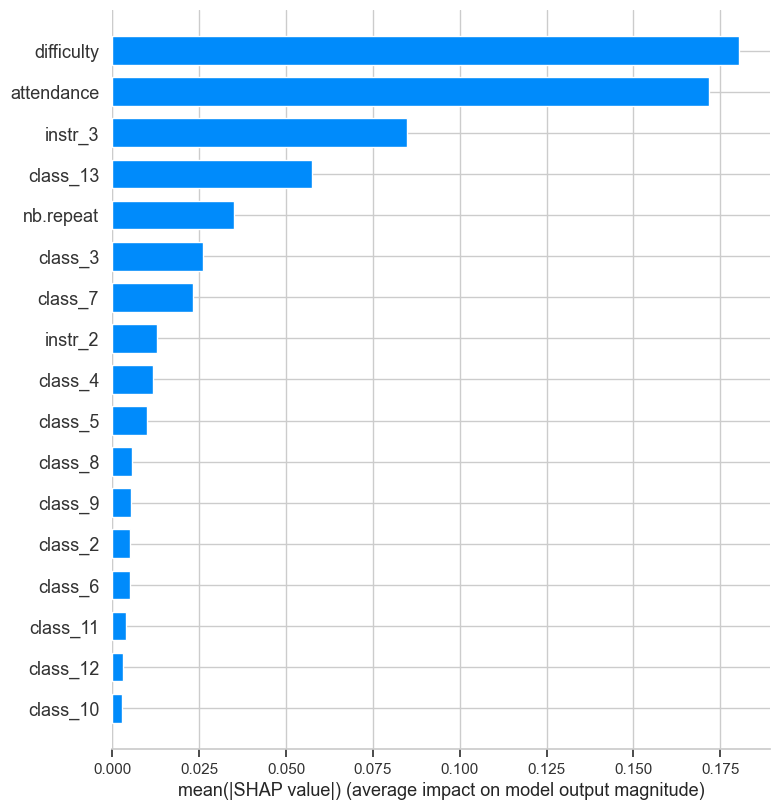

In [8]:
# ============================
# Random Forest Regression with SHAP Interpretability
# ============================

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate
evaluate_model(y_train, y_pred_train_rf, "Training (RF)")
evaluate_model(y_test, y_pred_test_rf, "Test (RF)")

# Feature importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top features by importance:")
display(importances.head(10))

# ----------------------------
# SHAP Explanation
# ----------------------------
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)


Training (XGBoost) Set Evaluation:
RMSE: 1.034
MAE: 0.816
R² Score: 0.198

Test (XGBoost) Set Evaluation:
RMSE: 1.155
MAE: 0.920
R² Score: 0.029

Top features by importance (XGBoost):


,Feature,Importance
4,instr_3,0.145760
10,class_7,0.076157
16,class_13,0.071068
5,class_2,0.061457
8,class_5,0.060596
6,class_3,0.060573
15,class_12,0.055172
1,attendance,0.054624
7,class_4,0.052830
2,difficulty,0.052546


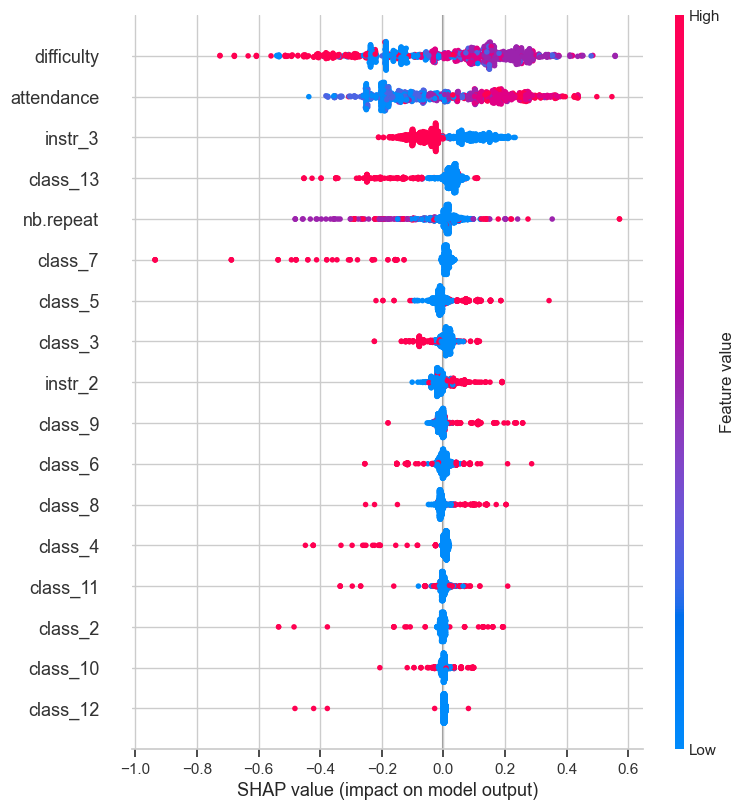

In [9]:
# ============================
# Gradient Boosting Regression (XGBoost) with SHAP
# ============================

import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate
evaluate_model(y_train, y_pred_train_xgb, "Training (XGBoost)")
evaluate_model(y_test, y_pred_test_xgb, "Test (XGBoost)")

# Feature importance
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top features by importance (XGBoost):")
display(xgb_importances.head(10))

# ----------------------------
# SHAP Explanation
# ----------------------------
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)

# Summary plot
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns)


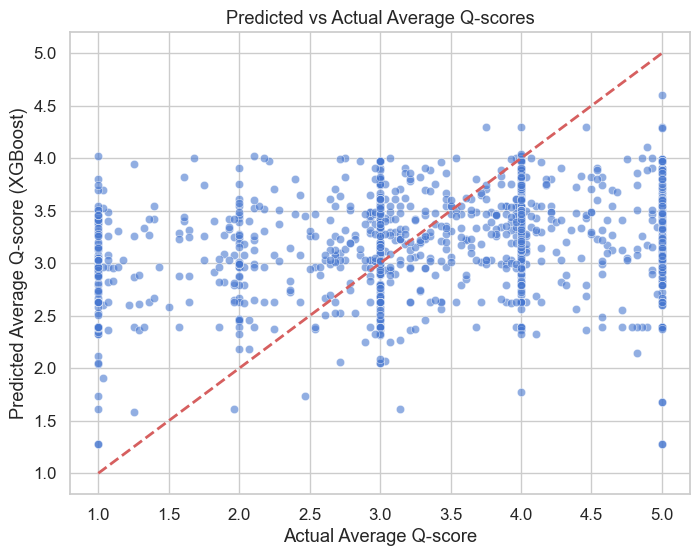

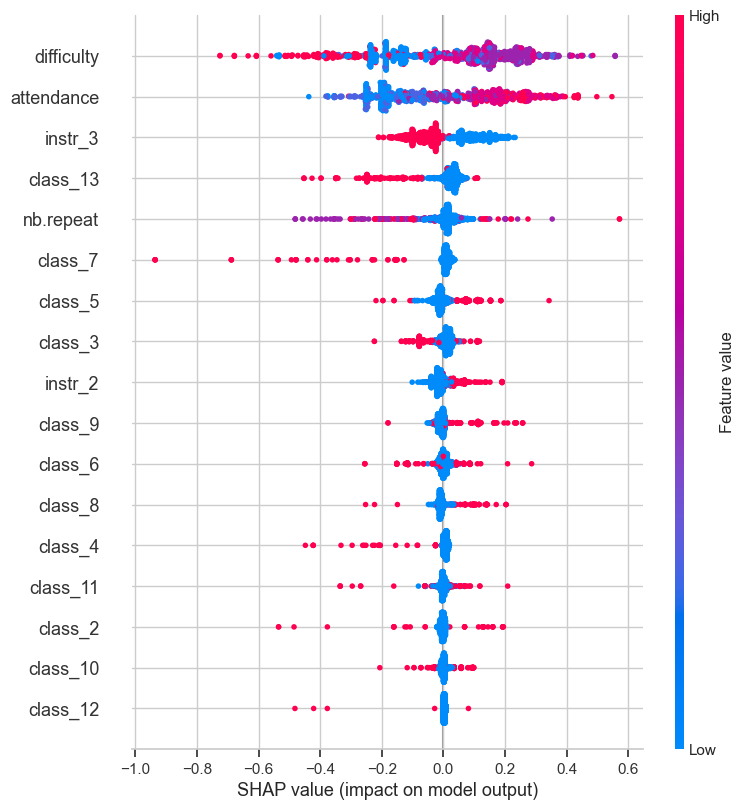

Predicted Average Q-score by Instructor:


,Instructor,Predicted Average Q-score
instr_3,3,2168.396973
instr_2,2,945.979736


Predicted Average Q-score by Class:


,Class,Predicted Average Q-score
class_13,13,529.287720
class_3,3,510.377197
class_5,5,413.595428
class_9,9,396.144897
class_6,6,392.324707
class_10,10,316.368347
class_11,11,297.762268
class_8,8,269.306458
class_7,7,132.451920
class_2,2,115.910553


In [10]:
# ============================
# Dashboard Visualization
# ============================

# 1. Predicted vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Average Q-score")
plt.ylabel("Predicted Average Q-score (XGBoost)")
plt.title("Predicted vs Actual Average Q-scores")
plt.show()

# 2. SHAP summary for feature influence
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns)

# 3. Instructor/Course Summary
# Predicted average Q-score by instructor
instructor_cols = [col for col in X_test.columns if 'instr_' in col]
X_test_instructor = X_test[instructor_cols].copy()
X_test_instructor['pred_avg_Qscore'] = y_pred_test_xgb
instructor_summary = pd.DataFrame({
    'Instructor': [col.split('_')[1] for col in instructor_cols],
    'Predicted Average Q-score': X_test_instructor[instructor_cols].mul(X_test_instructor['pred_avg_Qscore'], axis=0).sum()
})
print("Predicted Average Q-score by Instructor:")
display(instructor_summary.sort_values(by='Predicted Average Q-score', ascending=False))

# Predicted average Q-score by class
class_cols = [col for col in X_test.columns if 'class_' in col]
X_test_class = X_test[class_cols].copy()
X_test_class['pred_avg_Qscore'] = y_pred_test_xgb
class_summary = pd.DataFrame({
    'Class': [col.split('_')[1] for col in class_cols],
    'Predicted Average Q-score': X_test_class[class_cols].mul(X_test_class['pred_avg_Qscore'], axis=0).sum()
})
print("Predicted Average Q-score by Class:")
display(class_summary.sort_values(by='Predicted Average Q-score', ascending=False))


In [11]:
# ============================
# Save Trained Models
# ============================

import joblib
import os

# Create a directory to store models
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save Linear Regression
joblib.dump(baseline_model, os.path.join(model_dir, "linear_regression_model.pkl"))

# Save Random Forest
joblib.dump(rf_model, os.path.join(model_dir, "random_forest_model.pkl"))

# Save XGBoost
joblib.dump(xgb_model, os.path.join(model_dir, "xgboost_model.pkl"))

print(f"Models saved successfully in '{model_dir}' directory.")


Models saved successfully in 'saved_models' directory.


# Student Course Evaluation Analysis and Predictive Modeling

## 1. Project Overview
This project aimed to analyze student evaluation scores from Gazi University and develop predictive models to understand factors affecting course and instructor performance. The dataset contains **5820 records** with **28 course-specific Likert-scale questions** and 5 additional attributes including instructor ID, class ID, attendance, repeat count, and perceived difficulty.

The goal was to build interpretable, accurate predictive models that can inform instructors and administrators while complying with regulatory standards.

---

## 2. Methodology

### a. Environment Setup
- Imported essential libraries for data processing, visualization, machine learning, and interpretability (scikit-learn, XGBoost, SHAP, seaborn, matplotlib).

### b. Data Preprocessing
- Converted categorical variables (`instr`, `class`) to one-hot encodings.
- Removed aggregate features derived from the target variable to prevent **target leakage**.
- Created predictor (`X_corrected`) and target (`avg_Qscore`) datasets.

### c. Exploratory Data Analysis (EDA)
- Visualized distributions of average Q-scores.
- Analyzed correlations between predictors and target.
- Examined the effect of attendance, difficulty, and course repeats.
- Optional PCA analysis for Q1–Q28 features.

### d. Baseline Model
- Linear Regression on corrected features:
  - R² on test set: **0.028**
  - RMSE: **1.155**
- Revealed that attendance, difficulty, and repeats were the most influential features.

### e. Advanced Models
- **Random Forest Regressor**
  - Test R²: **0.044**, RMSE: **1.146**
  - SHAP explanations highlighted attendance and difficulty as top factors.
- **XGBoost Regressor**
  - Test R²: **0.029**, RMSE: **1.155**
  - Captured non-linear relationships and provided SHAP-based feature interpretability.

---

## 3. Key Insights
- **Attendance** and **difficulty** consistently affect average Q-scores.
- Some **instructors and classes** show higher or lower predicted scores, suggesting targeted improvement opportunities.
- Student evaluation scores are inherently noisy and subjective, limiting predictive power (low R²).

---

## 4. Recommendations
- Focus on improving attendance and managing course difficulty perception.
- Use SHAP insights to provide instructors with actionable feedback.
- Deploy models in an interactive dashboard to monitor and visualize predicted evaluations and influential factors.
- Periodically retrain models with new evaluation data for accuracy improvement.

---

## 5. Model Deployment
- All models (Linear Regression, Random Forest, XGBoost) have been saved for future predictions and integration into a dashboard using `joblib`.
- SHAP explanations ensure **interpretability** for regulatory compliance.

---

This comprehensive workflow demonstrates how student evaluation data can be used to generate predictive insights while maintaining interpretability and industry-standard practices.
